In [ ]:
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q torch
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q pyarrow==14.0.1
!pip install -q datasets
!pip install wandb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 278.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
!git clone https://github.com/huggingface/trl.git
%cd trl/
!pip install .

Cloning into 'trl'...
remote: Enumerating objects: 7046, done.
remote: Counting objects: 100% (1745/1745), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 7046 (delta 1580), reused 1513 (delta 1413), pack-reused 5301
Receiving objects: 100% (7046/7046), 6.50 MiB | 11.06 MiB/s, done.
Resolving deltas: 100% (4759/4759), done.
/content/trl
Processing /content/trl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 3.2 MB/s eta 0:00:00
  Created wheel for trl: filename=trl-0.8.7.dev0-py3-none-any.whl size=207432 sha256=07deecca37b87585745f7e48287cae60121334a1b445a048cb4e1bc95c0ccdc6
  Stored in directory: /tmp/pip-ephem-wheel-cache-zz67b1vs/wheels/6b/25/27/3b1530fe7be4495c561eaab87402fdaffaf39de50283890e8e
Successfully built trl


In [ ]:
%cd ..

/content


In [ ]:
import wandb
from google.colab import userdata, drive

# Defined in the secrets tab in Google Colab
hf_token = userdata.get('HuggingFace')
wb_token = userdata.get('wandb')
wandb.login(key=wb_token)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from huggingface_hub import whoami

user = whoami(token=hf_token)['name']

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from typing import TypeVar, List, Tuple, Dict, NoReturn
from datasets import DatasetDict, Dataset, IterableDatasetDict, IterableDataset

T = TypeVar("T")

DataPointType=DatasetDict | Dataset | IterableDatasetDict | IterableDataset
DataPointTrain =Dataset | List | T
DataPointTest =Dataset | List | T

from transformers.models.llama.tokenization_llama_fast import LlamaTokenizerFast
from transformers.models.mistral.modeling_mistral import MistralForCausalLM

In [ ]:
# BASE_MODEL_NAME = "mistralai/Mistral-7B-v0.1"
BASE_MODEL_NAME="mistralai/Mistral-7B-Instruct-v0.2"

OUTPUT_DIR_NAME = "Blueprint_Planning_Mistral_7B_v2"
ADAPTER_CHECKPOINTS_NAME = "ckpts_mistral_7B_blueprint_planning_v2"

In [ ]:
from transformers import AutoTokenizer

def load_tokenizer(model_id: str = BASE_MODEL_NAME)->LlamaTokenizerFast:
    tokenizer = AutoTokenizer.from_pretrained(model_id, add_eos_token=True)

    # Check if the pad token is already in the tokenizer
    if '[<pad>]' not in tokenizer.get_vocab():
        # Add the pad token
        tokenizer.add_tokens(['[<pad>]'])
        print("Added pad token")

    # Set the pad token
    tokenizer.pad_token = '[<pad>]'

    tokenizer.padding_side='left'

    # Print the pad token ids
    print('Tokenizer pad token ID:', tokenizer.pad_token_id)
    return tokenizer

In [ ]:
!pip install --upgrade huggingface_hub

In [ ]:
from huggingface_hub import login
login()

In [ ]:
tokenizer=load_tokenizer()

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Added pad token
Tokenizer pad token ID: 32000


In [ ]:
print("EOS token:", tokenizer.eos_token)
print("EOS token id:", tokenizer.eos_token_id)

print("Pad token: ", tokenizer.pad_token)
print("Pad token ID: ", tokenizer.pad_token_id)

print(tokenizer)

EOS token: </s>
EOS token id: 2
Pad token:  [<pad>]
Pad token ID:  32000
LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-Instruct-v0.2', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '[<pad>]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32000: AddedToken("[<pad>]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}


In [ ]:
from datasets import load_dataset

def custom_dataset_load(data_dir: str)->DataPointType:
    data = load_dataset(data_dir, split="train")
    return data

In [ ]:
def format_dataset_blueprint_fn(data_points: DataPointType) -> DataPointType:
    template = "Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task."

    INST = "### Instruction:"
    RESP = "### Response:"

    # Create the formatted text
    formatted_dataset = data_points.map(
        lambda x: {
            "prompt": "".join(
                [
                    f"{template}\n\n",
                    f"{INST}{x['Instruction'].strip()}\n\n",
                    f"{RESP}{x['Blueprint'].strip()}",
                ]
            ),
            "response": "".join(
                [
                    f"{RESP}{x['Blueprint'].strip()}",
                ]
            ),
        }
    )
    return formatted_dataset

In [ ]:
def format_dataset_blueprint_instruct_fn(data_points: DataPointType) -> DataPointType:
    template = "Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task."

    B_INST, E_INST = "[INST]", "[/INST]"
    RESP = "### Response:"

    # Create the formatted text
    formatted_dataset = data_points.map(
        lambda x: {
            "prompt": "".join(
                [
                    f"{B_INST}{template.strip()}{x['Instruction'].strip()}{E_INST}\n\n",
                    f"{RESP}{x['Blueprint']}",
                ]
            ),
            "response": "".join(
                [
                    f"{RESP}{x['Blueprint']}",
                ]
            ),
        }
    )
    return formatted_dataset

In [ ]:
def shuffle_tokenize_batch(data:DataPointType, tokenizer:LlamaTokenizerFast)->DataPointType:
    data = data.shuffle(seed=1234)  # Shuffle dataset here
    data = data.map(lambda samples: tokenizer(samples["prompt"]), batched=True)
    return data

In [ ]:
def split_train_test_dataset(data:DataPointType, split_size: float = 0.1)->Tuple[DataPointTrain,DataPointTest]:
    data = data.train_test_split(test_size=split_size)
    train_data = data["train"]
    test_data = data["test"]
    return train_data, test_data

In [ ]:
def format_prediction_blueprint_fn(data_point: DataPointType) -> str:
    template="Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task. Your response should be in the form of a dictionary with transitions (one-to-one or one-to-many depending on the task) between different subtasks and appropriate failure handling options. "

    INST = "### Instruction:"
    RESP = "### Response:"

    # Create the formatted text
    formatted_prediction = "".join(
        [
            f"{template}\n\n",
            f"{INST}{data_point['Instruction'].strip()}\n\n",
            f"{RESP}",
        ]
    )
    return formatted_prediction

In [ ]:
def format_prediction_blueprint_instruct_fn(data_point: DataPointType) -> str:
    template="Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task. Your response should be in the form of a dictionary with transitions (one-to-one or one-to-many depending on the task) between different subtasks and appropriate failure handling options. "

    B_INST, E_INST = "[INST]", "[/INST]"
    RESP = "### Response:"

    # Create the formatted text
    formatted_prediction = "".join(
        [
            f"{B_INST}{template}{data_point['Instruction'].strip()}{E_INST}\n\n",
            f"{RESP}",
        ]
    )
    return formatted_prediction

In [ ]:
import torch
from transformers import StoppingCriteria

class KeywordsStoppingCriteria(StoppingCriteria):
    def __init__(self, keywords, tokenizer, input_ids):
        self.keywords = keywords
        self.keyword_ids = []
        self.max_keyword_len = 0
        for keyword in keywords:
            cur_keyword_ids = tokenizer(keyword).input_ids
            if len(cur_keyword_ids) > 1 and cur_keyword_ids[0] == tokenizer.bos_token_id:
                cur_keyword_ids = cur_keyword_ids[1:]
            if len(cur_keyword_ids) > self.max_keyword_len:
                self.max_keyword_len = len(cur_keyword_ids)
            self.keyword_ids.append(torch.tensor(cur_keyword_ids))
        self.tokenizer = tokenizer
        self.start_len = input_ids.shape[1]

    def call_for_batch(self, output_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        offset = min(output_ids.shape[1] - self.start_len, self.max_keyword_len)
        self.keyword_ids = [keyword_id.to(output_ids.device) for keyword_id in self.keyword_ids]
        for keyword_id in self.keyword_ids:
            if (output_ids[0, -keyword_id.shape[0]:] == keyword_id).all():
                return True
        outputs = self.tokenizer.batch_decode(output_ids[:, -offset:], skip_special_tokens=True)[0]
        for keyword in self.keywords:
            if keyword in outputs:
                return True
        return False

    def __call__(self, output_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        outputs = []
        for i in range(output_ids.shape[0]):
            outputs.append(self.call_for_batch(output_ids[i].unsqueeze(0), scores))
        return all(outputs)

In [ ]:
def get_completion(prompt:str, model:MistralForCausalLM, tokenizer:LlamaTokenizerFast, keywords:List[str], keyword_stopping_criteria:KeywordsStoppingCriteria)->str:
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(model.device)

    stopping_criteria = keyword_stopping_criteria(keywords, tokenizer, input_ids)

    with torch.inference_mode():
      output_ids = model.generate(
          inputs=input_ids,
          use_cache=True,
          max_new_tokens=512,
          stopping_criteria=[stopping_criteria],
          attention_mask=None,
          do_sample=False,
          output_attentions=True,
          output_scores=True,
          return_dict_in_generate=True,
      )

    output = tokenizer.decode(output_ids['sequences'][0, input_ids.shape[1]:],skip_spectial_tokens=True).strip()

    return output

In [ ]:
data=custom_dataset_load('/content/drive/MyDrive/data')

Resolving data files:   0%|          | 0/202 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
data_blueprint=format_dataset_blueprint_instruct_fn(data)

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

In [ ]:
processed_data_blueprint=shuffle_tokenize_batch(data_blueprint,tokenizer)

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

In [ ]:
processed_df_blueprint = processed_data_blueprint.to_pandas()
processed_df_blueprint.head(5)

,Detailed,Instruction,Blueprint,prompt,response,input_ids,attention_mask
0,{'Convert the narrative and dialogues of a bri...,"Translate a short story into a screenplay, the...",{'Translate short story into screenplay': {'ne...,[INST]Below is an instruction that describes a...,### Response:{'Translate short story into scre...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"{""Curate a collection of digital artworks that...","Create a virtual art gallery exhibit, featurin...",{'Select artworks': {'next_modes': ['Write bio...,[INST]Below is an instruction that describes a...,### Response:{'Select artworks': {'next_modes'...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,{'Utilize advanced text analysis tools to gaug...,Analyze the sentiment of tweets related to a s...,{'Analyze sentiment': {'next_modes': ['Visuali...,[INST]Below is an instruction that describes a...,### Response:{'Analyze sentiment': {'next_mode...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,{'Collect high-resolution aerial footage of ta...,Analyze traffic patterns from drone footage of...,{'Capture drone footage': {'next_modes': ['Ana...,[INST]Below is an instruction that describes a...,### Response:{'Capture drone footage': {'next_...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,{'Identify fundamental programming concepts an...,Develop a software tutorial series including s...,{'Topic selection': {'next_modes': ['Script wr...,[INST]Below is an instruction that describes a...,### Response:{'Topic selection': {'next_modes'...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
train_data_blueprint,test_data_blueprint=split_train_test_dataset(processed_data_blueprint)

In [ ]:
print(len(train_data_blueprint),len(test_data_blueprint))

906 101


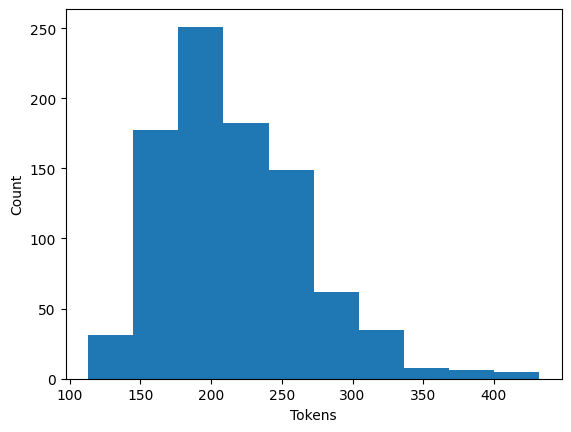

In [ ]:
from matplotlib import pyplot as plt

token_counts = []
for example in train_data_blueprint:
    token_counts.append(
        len(tokenizer(example['prompt'], add_special_tokens=True, return_attention_mask=False)["input_ids"])
    )
plt.hist(token_counts)
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.show();

In [ ]:
import torch
from transformers import AutoModelForCausalLM,BitsAndBytesConfig

def load_model_quantized(model_id: str = BASE_MODEL_NAME,device_map:Dict[str,int]={"": 0})->MistralForCausalLM:

    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_id, quantization_config=bnb_config, device_map=device_map
    )
    return model

In [ ]:
import torch
from transformers import AutoModelForCausalLM

def load_model(model_id: str = BASE_MODEL_NAME,device_map:Dict[str,int]={"": 0})->MistralForCausalLM:

    model = AutoModelForCausalLM.from_pretrained(model_id, device_map=device_map)
    return model

In [ ]:
model=load_model_quantized()

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
# Resize token embeddings
model.resize_token_embeddings(len(tokenizer))

# Update pad token id in model and its config
model.pad_token_id = tokenizer.pad_token_id
model.config.pad_token_id = tokenizer.pad_token_id

# Check if they are equal
assert model.pad_token_id == tokenizer.pad_token_id, "The model's pad token ID does not match the tokenizer's pad token ID"

In [ ]:
stop_keywords = ["</s>"," </s>", "</s> "]

In [ ]:
pred_prompt=format_prediction_blueprint_instruct_fn(test_data_blueprint[0])
print(pred_prompt)

[INST]Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task. Your response should be in the form of a dictionary with transitions (one-to-one or one-to-many depending on the task) between different subtasks and appropriate failure handling options. Create a marketing video for a new product launch, including a script, a storyboard, filming, and editing.[/INST]

### Response:


In [ ]:
output_base=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)
print(output_base)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
MistralModel is using MistralSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


```python
# Marketing Video Production Blueprint

# Task: Create a marketing video for a new product launch

# Subtasks:
# 1. Script Writing
# 2. Storyboard Creation
# 3. Filming
# 4. Editing

# Transitions:
# Script Writing -> Storyboard Creation
# Storyboard Creation -> Filming
# Filming -> Editing

# Dict:
task = {
    "Task": "Create a marketing video for a new product launch",
    "Subtasks": {
        "Script Writing": {
            "Description": "Write a compelling script for the marketing video",
            "Output": "Final script",
            "Transitions": ["[<pad>]([<pad>] Storyboard Creation)"],
            "Failure Handling": ["[<pad>] Script Rewrite"]
        },
        "Storyboard Creation": {
            "Description": "Create a visual representation of the video's content",
            "Output": "[<pad>] Storyboard",
            "Transitions": ["precede Script Writing"],
            "Failure Handling": ["[<pad>] Revise Storyboard"]
        },
        "Filming": {
  

In [ ]:
from peft import prepare_model_for_kbit_training,get_peft_model

def prepare_model_for_qlora_training(model:MistralForCausalLM,lora_config)->MistralForCausalLM:
  # Enable gradient checkpointing for the model
  model.gradient_checkpointing_enable()

  # Prepare the model for k-bit training using the "prepare_model_for_kbit_training" function
  model = prepare_model_for_kbit_training(model)

  # Get a model with LoRA applied to it using the defined configuration
  model = get_peft_model(model, lora_config)

  return model

In [ ]:
def print_trainable_parameters(model:MistralForCausalLM)->NoReturn:
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    # Iterate through model parameters
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    # Print the number of trainable parameters, total parameters, and the percentage of trainable parameters
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [ ]:
from trl import DataCollatorForCompletionOnlyLM

def custom_collator(tokenizer:LlamaTokenizerFast,response_template_with_context:str = "\n### Response:"):
  response_template_ids = tokenizer.encode(response_template_with_context, add_special_tokens=False)[2:]
  collator = DataCollatorForCompletionOnlyLM(response_template_ids, tokenizer=tokenizer)
  return collator

In [ ]:
from transformers import Trainer

def qlora_training_with_custom_collator(training_args,model:MistralForCausalLM,tokenizer:LlamaTokenizerFast,train_data,test_data,collator):
  # Create a trainer for fine-tuning a model
  trainer = Trainer(
      model=model,               # The model to be trained
      train_dataset=train_data,  # Training dataset
      eval_dataset=test_data,    # Evaluation dataset
      args=training_args,
      data_collator=collator,    # Custom data collator for completion
  )

  model.config.use_cache = False  # silence the warnings. Please re-enable for inference!

  trainer.train()

  return trainer, tokenizer, model

In [ ]:
from peft import LoraConfig

# Define a configuration for the LoRA (Learnable Requantization Activation) method
lora_config = LoraConfig(
    r=8,                                   # Number of quantization levels
    lora_alpha=32,                         # Hyperparameter for LoRA
    target_modules=["q_proj",
                    "k_proj",
                    "v_proj",
                    "o_proj",
                    "gate_proj",
                    "up_proj",
                    "down_proj"
                    ],             # Modules to apply LoRA to
    lora_dropout=0.05,                     # Dropout probability
    bias="none",                           # Type of bias
    task_type="CAUSAL_LM"                  # Task type (in this case, Causal Language Modeling)
)

In [ ]:
from transformers import TrainingArguments

In [ ]:
# Define a configuration for the training
training_args_blueprint=TrainingArguments(
        per_device_train_batch_size=4,        # Batch size per device during training
        gradient_accumulation_steps=4,        # Number of gradient accumulation steps
        gradient_checkpointing=True,
        warmup_ratio = 0.03 ,                 # Number of warm-up steps for learning rate
        max_steps=100,                        # Maximum number of training steps
        learning_rate=5e-5,                   # Learning rate
        lr_scheduler_type="cosine",           # cosine learning rate scheduler
        # bf16=True,                          # Enable mixed-precision training (Amper GPU)
        fp16=True,
        logging_steps=1,                      # Logging frequency during training
        output_dir=OUTPUT_DIR_NAME,           # Directory to save output files
        optim="paged_adamw_32bit",            # Optimizer type
        save_strategy="epoch",                # Strategy for saving checkpoints
        # push_to_hub=True                    # Push to the Hugging Face model hub
        report_to="wandb",
        do_eval=True,
        eval_strategy="steps",
        eval_steps=5,
    )

In [ ]:
model = prepare_model_for_qlora_training(model,lora_config)

In [ ]:
# Print the number of trainable parameters in the model after applying LoRA
print_trainable_parameters(model)

trainable params: 20971520 || all params: 3773050880 || trainable%: 0.5558239384251293


In [ ]:
collator=custom_collator(tokenizer)

In [ ]:
wandb.init(project="fine-tune mistral 7b for blueprint planning v2", name="blueprint_planning_v2")

wandb: Currently logged in as: ashmsn8665. Use `wandb login --relogin` to force relogin


In [ ]:
# Start QLORA fine-tuning for the blueprint planning
trainer, tokenizer, model = qlora_training_with_custom_collator(training_args_blueprint,model,tokenizer,train_data_blueprint,test_data_blueprint,collator)

max_steps is given, it will override any value given in num_train_epochs
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:209: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be up

Step,Training Loss,Validation Loss
5,1.838800,1.466372
10,0.708200,0.516668
15,0.262800,0.240221
20,0.205600,0.210068
25,0.237700,0.197475
30,0.180300,0.193587
35,0.171700,0.185918
40,0.181900,0.184072
45,0.188000,0.179911
50,0.163600,0.178185


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:209: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


In [ ]:
# Good practice to end your run
wandb.finish()

eval/loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/runtime,▁▆▇▇▅▅▆▇█▇▆██▆▆▆▆▆█▆
eval/samples_per_second,█▃▂▂▄▄▃▂▁▂▃▂▁▃▃▄▃▃▁▃
eval/steps_per_second,█▃▁▃▃▃▃▃▁▁▃▁▁▃▃▃▃▃▁▃
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
train/grad_norm,██ ▄▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▃███████▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
train/loss,██▄▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.16918
eval/runtime,20.8026


In [ ]:
# Save artifacts
trainer.model.save_pretrained(ADAPTER_CHECKPOINTS_NAME)
tokenizer.save_pretrained(ADAPTER_CHECKPOINTS_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:209: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


('ckpts_mistral_7B_blueprint_planning_v2/tokenizer_config.json',
 'ckpts_mistral_7B_blueprint_planning_v2/special_tokens_map.json',
 'ckpts_mistral_7B_blueprint_planning_v2/tokenizer.model',
 'ckpts_mistral_7B_blueprint_planning_v2/added_tokens.json',
 'ckpts_mistral_7B_blueprint_planning_v2/tokenizer.json')

In [ ]:
output=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)

print(pred_prompt)
print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]Below is an instruction that describes a composite task. Provide the structured blueprint planning for the following task. Your response should be in the form of a dictionary with transitions (one-to-one or one-to-many depending on the task) between different subtasks and appropriate failure handling options. Create a marketing video for a new product launch, including a script, a storyboard, filming, and editing.[/INST]

### Response:
{'Develop script': {'next_modes': ['Create storyboard'], 'failure': ['Retry', 'Exit', 'Fallback Content', 'Request Human Intervention']}, 'Create storyboard': {'next_modes': ['Film video'], 'failure': ['Retry', 'Switch to Different Mode', 'Log and Analyze', 'Quality Assurance Check']}, 'Film video': {'next_modes': ['Edit video'], 'failure': ['Retry', 'Exit', 'Partial Content Delivery', 'Mode Optimization']}, 'Edit video': {'next_modes': ['Analyzer'], 'failure': ['Retry', 'Exit', 'Quality Assurance Check', 'Alternative Data Sources']}, 'Analyzer': {

In [ ]:
print(output.strip("### Response:").strip("</s>"))

{'Create virtual tour': {'next_modes': ['Record narrator audio', 'Design multimedia elements'], 'failure': ['Retry', 'Exit', 'Fallback Content', 'Request Human Intervention']}, 'Record narrator audio': {'next_modes': ['Design multimedia elements'], 'failure': ['Retry', 'Switch to Different Mode', 'Quality Assurance Check', 'Partial Content Delivery']}, 'Design multimedia elements': {'next_modes': ['Analyzer'], 'failure': ['Retry', 'Exit', 'Log and Analyze', 'Alternative Data Sources']}, 'Analyzer': {'next_modes': [], 'failure': None}}


In [ ]:
test_data_blueprint[0]['Blueprint']

"{'Develop script': {'next_modes': ['Design storyboard', 'Write blog post'], 'failure': ['Retry', 'Exit', 'Fallback Content', 'Request Human Intervention']}, 'Design storyboard': {'next_modes': ['Film content'], 'failure': ['Retry', 'Exit', 'Switch to Different Mode', 'Quality Assurance Check']}, 'Film content': {'next_modes': ['Edit video'], 'failure': ['Retry', 'Request Human Intervention', 'Graceful Degradation', 'Partial Content Delivery']}, 'Edit video': {'next_modes': ['Analyzer'], 'failure': ['Retry', 'Exit', 'Log and Analyze', 'Mode Optimization']}, 'Analyzer': {'next_modes': [], 'failure': None}}"

In [ ]:
model.pad_token_id=tokenizer.pad_token_id
model.config.pad_token_id=tokenizer.pad_token_id

model.config.use_cache = True

In [ ]:
from tqdm import tqdm

outputs=[]
for i in tqdm(range(len(test_data_blueprint))):
  pred_prompt=format_prediction_blueprint_instruct_fn(test_data_blueprint[i])

  output=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)

  outputs.append(output)

print(outputs)

  0%|          | 0/101 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
  1%|          | 1/101 [00:21<36:36, 21.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
  2%|▏         | 2/101 [00:35<27:45, 16.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
  3%|▎         | 3/101 [00:53<28:30, 17.45s/it]The attention mask and the pad token id were not set. As a consequence, you may

["{'Develop script': {'next_modes': ['Create storyboard'], 'failure': ['Retry', 'Exit', 'Fallback Content', 'Request Human Intervention']}, 'Create storyboard': {'next_modes': ['Film video'], 'failure': ['Retry', 'Switch to Different Mode', 'Log and Analyze', 'Quality Assurance Check']}, 'Film video': {'next_modes': ['Edit video'], 'failure': ['Retry', 'Exit', 'Partial Content Delivery', 'Mode Optimization']}, 'Edit video': {'next_modes': ['Analyzer'], 'failure': ['Retry', 'Exit', 'Quality Assurance Check', 'Alternative Data Sources']}, 'Analyzer': {'next_modes': [], 'failure': None}}</s>", "{'Analyze social media trends': {'next_modes': ['Develop memes'], 'failure': ['Retry', 'Exit', 'Fallback Content', 'Log and Analyze']}, 'Develop memes': {'next_modes': ['Analyzer'], 'failure': ['Retry', 'Switch to Different Mode', 'Quality Assurance Check', 'Alternative Data Sources']}, 'Analyzer': {'next_modes': [], 'failure': None}}</s>", "{'Write a science fiction short story': {'next_modes': ['

In [ ]:
test_data_with_blueprint_pred=test_data_blueprint.add_column("blueprint-pred",outputs)

Flattening the indices:   0%|          | 0/101 [00:00<?, ? examples/s]

In [ ]:
df_test_with_blueprint_pred = test_data_with_blueprint_pred.to_pandas()

In [ ]:
df_test_with_blueprint_pred.head(5)

,Detailed,Instruction,Blueprint,prompt,response,input_ids,attention_mask,blueprint-pred
0,"{""Brainstorm and write a captivating script hi...",Create a marketing video for a new product lau...,{'Develop script': {'next_modes': ['Design sto...,[INST]Below is an instruction that describes a...,### Response:{'Develop script': {'next_modes':...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",{'Develop script': {'next_modes': ['Create sto...
1,{'Conduct in-depth research on current social ...,Analyze social media trends to develop a serie...,{'Research trends': {'next_modes': ['Create me...,[INST]Below is an instruction that describes a...,### Response:{'Research trends': {'next_modes'...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",{'Analyze social media trends': {'next_modes':...
2,{'Craft a compelling science fiction short sto...,"Write a science fiction short story, convert i...",{'Write a short story': {'next_modes': ['Conve...,[INST]Below is an instruction that describes a...,### Response:{'Write a short story': {'next_mo...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",{'Write a science fiction short story': {'next...
3,{'Develop a narrative for a short story focusi...,"Write a short story, adapt it into a screenpla...",{'Write a short story': {'next_modes': ['Adapt...,[INST]Below is an instruction that describes a...,### Response:{'Write a short story': {'next_mo...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",{'Write a short story': {'next_modes': ['Adapt...
4,{'Conduct a detailed sentiment analysis on cus...,Analyze customer reviews to identify improveme...,{'Analyze customer reviews': {'next_modes': ['...,[INST]Below is an instruction that describes a...,### Response:{'Analyze customer reviews': {'ne...,"[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",{'Analyze reviews': {'next_modes': ['Implement...


In [ ]:
import json
import numpy as np

# Convert DataFrame to a dictionary for prettier JSON
data_dict = df_test_with_blueprint_pred.to_dict(orient='records')

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

dumped = json.dumps(data_dict, cls=NumpyEncoder)

# Writing prettified JSON to a file
with open('data_test_with_blueprint_pred_v2.json', 'w') as f:
    json.dump(dumped, f, indent=4)

In [ ]:
from google.colab import files

files.download('data_test_with_blueprint_pred_v2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r ckpts_mistral_7B_blueprint_planning_v2.zip ckpts_mistral_7B_blueprint_planning_v2/

  adding: ckpts_mistral_7B_blueprint_planning_v2/ (stored 0%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/tokenizer.model (deflated 55%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/tokenizer_config.json (deflated 66%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/added_tokens.json (stored 0%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/special_tokens_map.json (deflated 72%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/adapter_model.safetensors (deflated 50%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/adapter_config.json (deflated 54%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/README.md (deflated 66%)
  adding: ckpts_mistral_7B_blueprint_planning_v2/tokenizer.json (deflated 74%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!cp ckpts_mistral_7B_blueprint_planning_v2.zip '/content/drive/MyDrive'

In [ ]:
# from huggingface_hub import create_repo

# repo_id = f'{user}/{OUTPUT_DIR_NAME}'

# # Set exist_ok to False if the repo has not been created yet
# url = create_repo(repo_id, token=hf_token, exist_ok=True)

# print(url)

In [ ]:
# # Flush memory
# del trainer, model
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# import torch
# from transformers import AutoModelForCausalLM, AutoTokenizer
# from peft import PeftModel

# base_model = AutoModelForCausalLM.from_pretrained(
#     BASE_MODEL_NAME,
#     device_map="auto",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2" # for Amper GPU
# )

# model = PeftModel.from_pretrained(base_model, ADAPTER_CHECKPOINTS_NAME)
# model = model.merge_and_unload()

# tokenizer = AutoTokenizer.from_pretrained(ADAPTER_CHECKPOINTS_NAME)
# tokenizer.pad_token, tokenizer.pad_token_id, tokenizer.padding_side

In [ ]:
# # Save model and tokenizer
# model.save_pretrained(OUTPUT_DIR_NAME)
# tokenizer.save_pretrained(OUTPUT_DIR_NAME)

In [ ]:
# from pathlib import Path

# from huggingface_hub import ModelCard, ModelCardData

# card_data = ModelCardData(language='en', license='MIT', library_name='torch')

# # Define your jinja template
# template_text = """
# ---
# {{ card_data }}
# ---

# # Model Card for Decompose_Task_Mistral-7B

# ## Model Details

# ### Model Description

# This model decomposes a multi-modal composite task to detailed actionable subtasks

# - **Developed by:** Arash Shahmansoori
# - **Language(s) (NLP):** en
# - **License:** mit
# - **Finetuned from model:** Mistral-7B-v0.1

# ### Model Sources

# - **Repository:** https://github.com/arash-shahmansoori/decompose_net.git
# - **Paper [optional]:** https://medium.com/@arash.mansoori65/decompose-and-conquer-introducing-the-first-open-source-large-language-model-with-multi-modal-task-9d3683dd8bed
# """.strip()

# # Write the template to a file
# Path('custom_template.md').write_text(template_text)

# # Define card metadata
# card_data = ModelCardData(language='en', license='mit', library_name='torch')

# # Create card from template, passing it any jinja template variables you want.
# # In our case, we'll pass author
# card = ModelCard.from_template(card_data, template_path='custom_template.md', author='Arash Shahmansoori')
# card.save('decompose_net_card.md')
# print(card)

In [ ]:
# card.push_to_hub(repo_id, token=hf_token)